In [1]:
import pandas as pd
from datasource.price import get_historical
import matplotlib.pyplot as plt

from feature_util.ohlc import CCIFeatureProducer
from feature_util.ohlc import SimpleMovingAverageFeatureProducer
from feature_util.ohlc import ExponentialMovingAverageFeatureProducer
from feature_util.ohlc import TypicalPriceFeatureProducer

In [2]:
symbol = 'BLL'

In [25]:
df = get_historical(symbol, '2017-11-1', '2018-5-9')

In [26]:
df

,close,high,low,open,volume
2017-11-01,42.486926,43.024232,42.397376,42.984431,2249686
2017-11-02,41.591417,42.611303,40.069052,42.417276,5978642
2017-11-03,41.541667,41.879970,41.223264,41.611318,2863990
2017-11-06,41.243164,41.611318,40.949636,41.611318,2752961
2017-11-07,40.845160,41.501867,40.835210,41.292914,2164874
2017-11-08,40.536707,40.954611,40.467056,40.845160,3323242
2017-11-09,40.118803,40.581482,39.939701,40.248154,2857010
2017-11-10,39.780499,40.069052,39.740699,40.029252,2826219
2017-11-13,40.108853,40.158603,39.581497,39.631248,4336345
2017-11-14,39.790449,40.088952,39.700898,39.889950,2995851


In [27]:
cci_producer = CCIFeatureProducer(period=20, abs_threshold=None)
feat_df = cci_producer.produce(df)

sma_producer = SimpleMovingAverageFeatureProducer(period=20)
ema_producer = ExponentialMovingAverageFeatureProducer(period=20)

feat_df = sma_producer.produce(feat_df)
feat_df = ema_producer.produce(feat_df)

tp_producer = TypicalPriceFeatureProducer()
feat_df = tp_producer.produce(feat_df)

In [28]:
feat_df

,close,high,low,open,volume,cci,close_sma_20,close_ema_20,tp
2017-11-01,42.486926,43.024232,42.397376,42.984431,2249686,NaN,NaN,42.486926,42.636178
2017-11-02,41.591417,42.611303,40.069052,42.417276,5978642,NaN,NaN,42.016784,41.423924
2017-11-03,41.541667,41.879970,41.223264,41.611318,2863990,NaN,NaN,41.842324,41.548300
2017-11-06,41.243164,41.611318,40.949636,41.611318,2752961,NaN,NaN,41.669356,41.268039
2017-11-07,40.845160,41.501867,40.835210,41.292914,2164874,NaN,NaN,41.469990,41.060745
2017-11-08,40.536707,40.954611,40.467056,40.845160,3323242,NaN,NaN,41.273110,40.652791
2017-11-09,40.118803,40.581482,39.939701,40.248154,2857010,NaN,NaN,41.054859,40.213329
2017-11-10,39.780499,40.069052,39.740699,40.029252,2826219,NaN,NaN,40.834579,39.863417
2017-11-13,40.108853,40.158603,39.581497,39.631248,4336345,NaN,NaN,40.718169,39.949651
2017-11-14,39.790449,40.088952,39.700898,39.889950,2995851,NaN,NaN,40.578463,39.860100


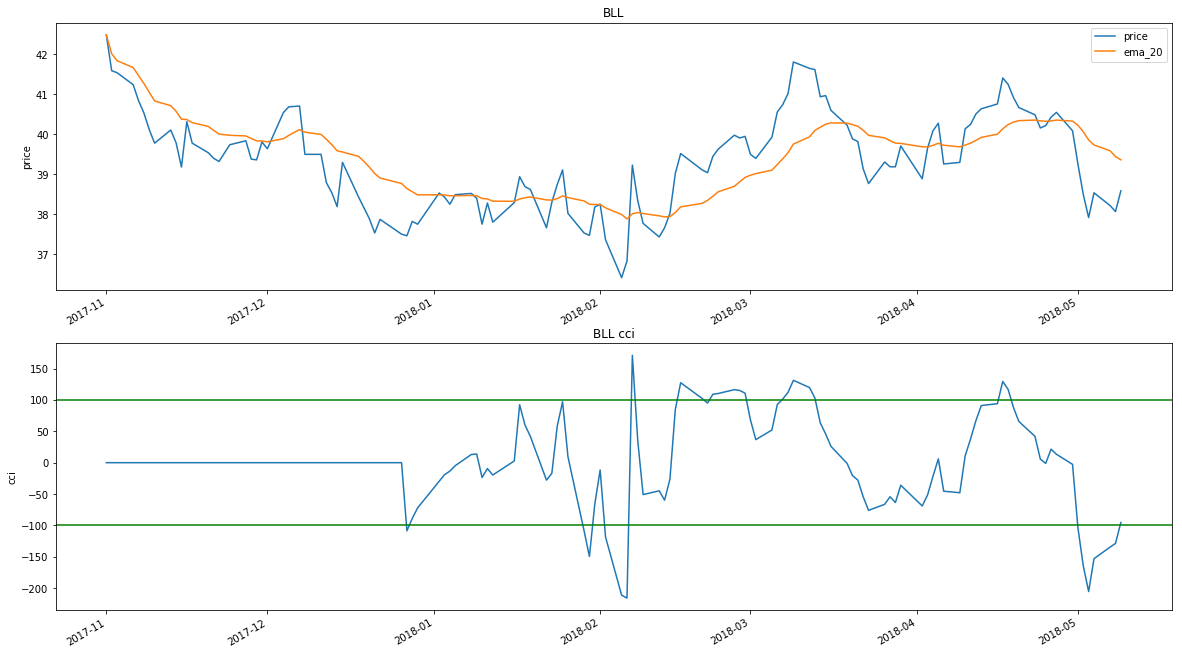

In [29]:
plt.figure(figsize=(20,12))

plt.figure(1)
plt.subplot(211)
feat_df['close'].plot()
feat_df['close_ema_20'].plot()
plt.legend(['price', 'ema_20'])
plt.ylabel('price')
plt.title(symbol)

plt.subplot(212)
fig = feat_df['cci'].fillna(0).plot()
plt.axhline(y=100, color='g', linestyle='-')
plt.axhline(y=-100, color='g', linestyle='-')
plt.ylabel('cci')
plt.title(symbol + ' cci')
plt.show()

## Strategy with CCI

In [8]:
def cci_strategy_return(df, threshold, period, debug=False):
    
    def get_cci_trade_point(df):
        trades = []
        previous_cci = 0
        state = 'neutral'
        for index, row in df.iterrows():
            if row['cci'] > threshold and row['cci'] < previous_cci and state != 'overbought':
                state = 'overbought'
                trades.append((index, 'sell', row['close']))
            elif row['cci'] < -threshold and row['cci'] > previous_cci and state != 'oversold':
                state = 'oversold'
                trades.append((index, 'buy', row['close']))
            previous_cci = row['cci']
        
        return trades
    
    def cal_trade_return(trades):
        r = 1
        i = 1
    
        if trades[0][1] == 'sell':
            trades = trades[1:]
        
        while i <= len(trades) - 1:
            diff = 1.0 * (trades[i][2] / trades[i - 1][2])
            r *= diff
            i += 2
        
        return r
    
    cci_producer = CCIFeatureProducer(period=period, abs_threshold=None)
    feat_df = cci_producer.produce(df)

    trades = get_cci_trade_point(feat_df)
    if debug:
        for t in trades:
            print(t)
        
    return cal_trade_return(trades)

In [30]:
symbols = ['IT', 'BXP', 'COO', 'AVGO', 'FL', 'AON', 'IR', 'BLL']
start = '2017-11-1'
end = '2018-5-1'
threshold = 100
period = 20

In [31]:
print('CCI strategy return between %s and %s' % (start, end))

def get_return(s):
    df = get_historical(s, start, end)
    cci_return = cci_strategy_return(df, threshold, period)
    static_return = 1.0 * df['close'].values[-1] / df['close'].values[0]
    return {'cci_return': cci_return, 'static_return': static_return}

returns = [get_return(s) for s in symbols]
result = pd.DataFrame(data=returns, index=symbols)
result

CCI strategy return between 2017-11-1 and 2018-5-1


,cci_return,static_return
IT,1.000000,0.971417
BXP,1.011303,1.018461
COO,1.000000,0.983539
AVGO,1.000000,0.900747
FL,1.000000,1.445575
AON,1.000000,1.005488
IR,1.000000,0.991916
BLL,1.000000,0.924049


In [11]:
cci_strategy_return(get_historical('BXP', start, end), debug=True)

TypeError: cci_strategy_return() takes at least 3 arguments (2 given)